# Análise dos Preços dos Combustíveis no Brasil: 2022-2024

## Introdução

### Contexto do Projeto

A variação nos preços dos combustíveis impacta diretamente a economia e o cotidiano dos brasileiros. Compreender essas oscilações é essencial para consumidores, empresários e gestores públicos. A Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP) publica relatórios semanais sobre os preços dos combustíveis em todo o país. Este estudo analisa dados históricos a partir de 2022, incluindo preços médios, mínimos e máximos dos diferentes tipos de combustíveis, segmentados por região e estado. A análise detalha as variações recentes e identifica tendências, levando em conta as diferenças regionais.

### Importância da Análise

Compreender os preços dos combustíveis é fundamental para traçar o cenário econômico e tomar decisões assertivas. Identificar tendências e padrões regionais e ao longo do tempo ajuda tanto na estratégia de negócios quanto na formulação de políticas públicas. Isso contribui para a estabilidade econômica e para a defesa dos interesses dos consumidores.

### Objetivos do Projeto

1. **Analisar a Variação dos Preços:** Examinar as oscilações dos preços dos combustíveis ao longo do tempo e como elas diferem entre regiões e estados.

2. **Comparar Preços Regionais:** Destacar os combustíveis com preços mais altos e mais baixos em cada região.

3. **Avaliar a Volatilidade:** Investigar a variação dos preços com base em análises estatísticas, como o desvio padrão e o coeficiente de variação.

4. **Explorar Relações:** Verificar se há uma relação entre a quantidade de postos de combustíveis avaliados e os preços praticados.

5. **Antecipar Tendências de Mercado:** Usar modelos de séries temporais e machine learning para estimar os preços dos combustíveis no primeiro semestre de 2025.

### Descrição Geral dos Dados

Os dados utilizados para esta análise foram fornecidos pela ANP e abrangem a série histórica do levantamento semanal de preços desde **janeiro de 2022** até **setembro de 2024**. Os dados incluem informações sobre:

- **DATA INICIAL:** Data de início da pesquisa.
- **DATA FINAL:** Data de término da pesquisa.
- **REGIÃO:** Região geográfica de coleta dos dados.
- **ESTADO:** Estado brasileiro onde os dados foram coletados.
- **MUNICÍPIO:** Município específico da coleta.
- **PRODUTO:** Tipo de combustível (_etanol, gasolina comum, GLP, GNV, óleo diesel, óleo diesel S10, gasolina aditivada_).
- **NÚMERO DE POSTOS PESQUISADOS:** Quantidade de postos de combustíveis incluídos na pesquisa.
- **UNIDADE DE MEDIDA:** Unidade em que o preço é medido.
- **PREÇO MÉDIO REVENDA:** Preço médio de revenda do combustível.
- **DESVIO PADRÃO REVENDA:** Desvio padrão dos preços de revenda.
- **PREÇO MÍNIMO REVENDA:** Preço mínimo de revenda.
- **PREÇO MÁXIMO REVENDA:** Preço máximo de revenda.
- **MARGEM MÉDIA REVENDA:** Margem média de revenda.
- **COEF DE VARIAÇÃO REVENDA:** Coeficiente de variação dos preços de revenda.

## Exploração dos Dados

### Limpeza e Preparação dos Dados

**Importação das Bibliotecas**

In [46]:
# Bibliotecas usadas
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

**Importação dos Dados**

In [47]:
# Importação da base de dados
df_combustivel = pd.read_csv('https://raw.githubusercontent.com/SimoesLeticia/Bootcamp-Data-Analytics-WoMakersCode/main/10.%20Projeto%20Final/preco-combustivel-2022-2024.csv')

# Visualizando os dados
df_combustivel.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,MUNICÍPIO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA
0,1/2/2022,1/8/2022,SUDESTE,SAO PAULO,ADAMANTINA,ETANOL HIDRATADO,7,R$/l,"4,656","0,078","4,580","4,790",-,"0,017"
1,1/2/2022,1/8/2022,CENTRO OESTE,GOIAS,AGUAS LINDAS DE GOIAS,ETANOL HIDRATADO,4,R$/l,"5,199","0,001","5,198","5,199",-,"0,000"
2,1/2/2022,1/8/2022,SUL,RIO GRANDE DO SUL,ALEGRETE,ETANOL HIDRATADO,2,R$/l,"6,845","0,643","6,390","7,299",-,"0,094"
3,1/2/2022,1/8/2022,NORTE,PARA,ALENQUER,ETANOL HIDRATADO,1,R$/l,"7,120","0,000","7,120","7,120",-,"0,000"
4,1/2/2022,1/8/2022,SUDESTE,MINAS GERAIS,ALFENAS,ETANOL HIDRATADO,2,R$/l,"5,499","0,000","5,499","5,499",-,"0,000"


**Visualização Inicial**

In [48]:
# Quantidade de linhas e colunas
print(df_combustivel.shape)

(330928, 14)


In [49]:
# Valores faltantes
print(df_combustivel.isnull().sum())

DATA INICIAL                    0
DATA FINAL                      0
REGIÃO                          0
ESTADO                          0
MUNICÍPIO                       0
PRODUTO                         0
NÚMERO DE POSTOS PESQUISADOS    0
UNIDADE DE MEDIDA               0
PREÇO MÉDIO REVENDA             0
DESVIO PADRÃO REVENDA           0
PREÇO MÍNIMO REVENDA            0
PREÇO MÁXIMO REVENDA            0
MARGEM MÉDIA REVENDA            0
COEF DE VARIAÇÃO REVENDA        0
dtype: int64


In [50]:
# Tipos de variáveis
print(df_combustivel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330928 entries, 0 to 330927
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   DATA INICIAL                  330928 non-null  object
 1   DATA FINAL                    330928 non-null  object
 2   REGIÃO                        330928 non-null  object
 3   ESTADO                        330928 non-null  object
 4   MUNICÍPIO                     330928 non-null  object
 5   PRODUTO                       330928 non-null  object
 6   NÚMERO DE POSTOS PESQUISADOS  330928 non-null  int64 
 7   UNIDADE DE MEDIDA             330928 non-null  object
 8   PREÇO MÉDIO REVENDA           330928 non-null  object
 9   DESVIO PADRÃO REVENDA         330928 non-null  object
 10  PREÇO MÍNIMO REVENDA          330928 non-null  object
 11  PREÇO MÁXIMO REVENDA          330928 non-null  object
 12  MARGEM MÉDIA REVENDA          330928 non-null  object
 13 

**Conversão de Datas**

As colunas `DATA INICIAL` e `DATA FINAL` estão no formato `object`, então vamos convertê-los para datetime.

In [51]:
# Converter colunas para o tipo DateTime
df_combustivel["DATA INICIAL"] = pd.to_datetime(
    df_combustivel["DATA INICIAL"], errors="coerce", format="%m/%d/%Y"
)
df_combustivel["DATA FINAL"] = pd.to_datetime(
    df_combustivel["DATA FINAL"], errors="coerce", format="%m/%d/%Y"
)

**Conversão de Valores Numéricos**

Os valores numéricos estão no formato `object` com vírgulas como separadores decimais. Precisamos remover as vírgulas e converter os valores para o tipo `float`.

In [52]:
# Função para converter valores de string com vírgula para float
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(".", "").replace(",", ".")
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value


# Aplicar a conversão em todas as colunas numéricas
cols_numericas = [
    "PREÇO MÉDIO REVENDA",
    "DESVIO PADRÃO REVENDA",
    "PREÇO MÍNIMO REVENDA",
    "PREÇO MÁXIMO REVENDA",
    "MARGEM MÉDIA REVENDA",
    "COEF DE VARIAÇÃO REVENDA",
]

for col in cols_numericas:
    df_combustivel[col] = df_combustivel[col].apply(convert_to_numeric)

**Tratamento de Valores Nulos**

Após a conversão dos dados, é comum se deparar com valores nulos. Existem estratégias para lidar com isso:

1. **Exclusão:** Podemos remover as linhas ou colunas com dados ausentes.

2. **Substituição:** Uma alternativa é preencher os valores nulos com um número fixo, como zero, por exemplo.

No meu projeto, escolhi substituir os valores nulos por zero, já que apenas na coluna `MARGEM MÉDIA REVENDA` havia dados faltantes após a conversão.

In [53]:
df_combustivel = df_combustivel.fillna(0)

**Exclusão de Campos Desnecessários para Análise**

Como as análises serão focadas nas variações de preços por região e estado, decidi eliminar a coluna `MUNICÍPIO`. Além disso, a coluna `MARGEM MÉDIA REVENDA` também não será utilizada e foi removida do dataset.

In [54]:
df_combustivel = df_combustivel.drop(
    columns=["MUNICÍPIO", "MARGEM MÉDIA REVENDA"]
)

**Verificação Pós-Tratamento das colunas**

In [55]:
# Verificar o tipo das variáveis após as conversões
print(df_combustivel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330928 entries, 0 to 330927
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   DATA INICIAL                  330928 non-null  datetime64[ns]
 1   DATA FINAL                    330928 non-null  datetime64[ns]
 2   REGIÃO                        330928 non-null  object        
 3   ESTADO                        330928 non-null  object        
 4   PRODUTO                       330928 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS  330928 non-null  int64         
 6   UNIDADE DE MEDIDA             330928 non-null  object        
 7   PREÇO MÉDIO REVENDA           330928 non-null  float64       
 8   DESVIO PADRÃO REVENDA         330928 non-null  float64       
 9   PREÇO MÍNIMO REVENDA          330928 non-null  float64       
 10  PREÇO MÁXIMO REVENDA          330928 non-null  float64       
 11  COEF DE VARIA

**Verificação Final**

In [56]:
# Visualizar novamente o do dataframe para confirmar a limpeza
df_combustivel.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
0,2022-01-02,2022-01-08,SUDESTE,SAO PAULO,ETANOL HIDRATADO,7,R$/l,4.656,0.078,4.580,4.790,0.017
1,2022-01-02,2022-01-08,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,4,R$/l,5.199,0.001,5.198,5.199,0.000
2,2022-01-02,2022-01-08,SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,2,R$/l,6.845,0.643,6.390,7.299,0.094
3,2022-01-02,2022-01-08,NORTE,PARA,ETANOL HIDRATADO,1,R$/l,7.120,0.000,7.120,7.120,0.000
4,2022-01-02,2022-01-08,SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,2,R$/l,5.499,0.000,5.499,5.499,0.000


### Análise Exploratória dos Dados

#### Estatísticas Descritivas

In [57]:
# Estatísticas descritivas para variáveis numéricas
df_combustivel.describe()

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
count,330928,330928,330928.000000,330928.000000,330928.000000,330928.000000,330928.000000,330928.000000
mean,2023-05-02 02:26:43.751873792,2023-05-08 02:26:43.751873792,8.741469,21.646686,0.928461,20.389888,23.063462,0.032178
min,2022-01-02 00:00:00,2022-01-08 00:00:00,1.000000,2.750000,0.000000,2.390000,2.790000,0.000000
25%,2022-08-07 00:00:00,2022-08-13 00:00:00,5.000000,5.300000,0.081000,5.050000,5.530000,0.014000
50%,2023-05-28 00:00:00,2023-06-03 00:00:00,7.000000,5.930000,0.163000,5.730000,6.190000,0.027000
75%,2023-12-24 00:00:00,2023-12-30 00:00:00,10.000000,6.910000,0.298000,6.690000,7.190000,0.045000
max,2024-07-28 00:00:00,2024-08-03 00:00:00,210.000000,154.250000,32.146000,154.000000,160.000000,0.491000
std,NaN,NaN,9.564359,37.156441,2.190488,34.811132,39.873207,0.026188


In [58]:
# Estatísticas descritivas para variáveis categóricas
df_combustivel.select_dtypes(include="object").describe()

,REGIÃO,ESTADO,PRODUTO,UNIDADE DE MEDIDA
count,330928,330928,330928,330928
unique,5,27,7,3
top,SUDESTE,SAO PAULO,GASOLINA COMUM,R$/l
freq,155538,82075,53894,262941


In [59]:
# Categorias únicas para variáveis categóricas
for col in df_combustivel.select_dtypes(include="object").columns:
    print(f"{col}: {df_combustivel[col].unique()}\n")

REGIÃO: ['SUDESTE' 'CENTRO OESTE' 'SUL' 'NORTE' 'NORDESTE']

ESTADO: ['SAO PAULO' 'GOIAS' 'RIO GRANDE DO SUL' 'PARA' 'MINAS GERAIS'
 'MATO GROSSO' 'RIO DE JANEIRO' 'PARANA' 'SERGIPE' 'ESPIRITO SANTO'
 'TOCANTINS' 'ALAGOAS' 'SANTA CATARINA' 'PERNAMBUCO' 'BAHIA' 'PARAIBA'
 'RORAIMA' 'DISTRITO FEDERAL' 'RONDONIA' 'MATO GROSSO DO SUL' 'CEARA'
 'ACRE' 'MARANHAO' 'AMAZONAS' 'RIO GRANDE DO NORTE' 'PIAUI' 'AMAPA']

PRODUTO: ['ETANOL HIDRATADO' 'GASOLINA ADITIVADA' 'GASOLINA COMUM' 'GLP' 'GNV'
 'OLEO DIESEL' 'OLEO DIESEL S10']

UNIDADE DE MEDIDA: ['R$/l' 'R$/13kg' 'R$/m³']



#### Análise da Distribuição dos Preços de Combustíveis

In [74]:
# Definir o tema e a paleta
sns.set_theme(style="whitegrid", palette="Blues_r")

In [73]:
def plot_distribuicao_precos(produto, df):
    """
    Gera uma figura com três histogramas na parte superior e três boxplots na parte inferior,
    mostrando a distribuição dos preços de revenda (médio, mínimo e máximo) para um determinado combustível.

    Parâmetros:
    produto (str): O nome do combustível para filtrar os dados.
    df (pd.DataFrame): O DataFrame contendo os dados dos preços de combustíveis.
    """

    # Filtrar o DataFrame pelo produto
    df_produto = df[df['PRODUTO'] == produto]

    # Criar a figura com 2 linhas e 3 colunas
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), gridspec_kw={'height_ratios': [2, 1]})

    # Colunas a serem plotadas
    colunas = ['PREÇO MÉDIO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA']

    # Loop para gerar os histogramas na primeira linha
    for i, coluna in enumerate(colunas):
        sns.histplot(df_produto[coluna], kde=True, bins=10, ax=axes[0, i])
        axes[0, i].set_title(f'Distribuição do {colunas[i]}')
        axes[0, i].set_xlabel('')
        axes[0, i].set_ylabel('Frequência')

    # Loop para gerar os boxplots na segunda linha
    for i, coluna in enumerate(colunas):
        sns.boxplot(data=df_produto, x=coluna, ax=axes[1, i], fill=False)
        axes[1, i].set_xlabel('')

    # Ajustar o layout
    plt.suptitle(f"Distribuição dos Preços de Revenda - {produto}", fontsize=16)
    plt.tight_layout()
    sns.despine(top=True, right=True)

    # Mostrar o gráfico
    plt.show()

**Combustível: ETANOL HIDRATADO**

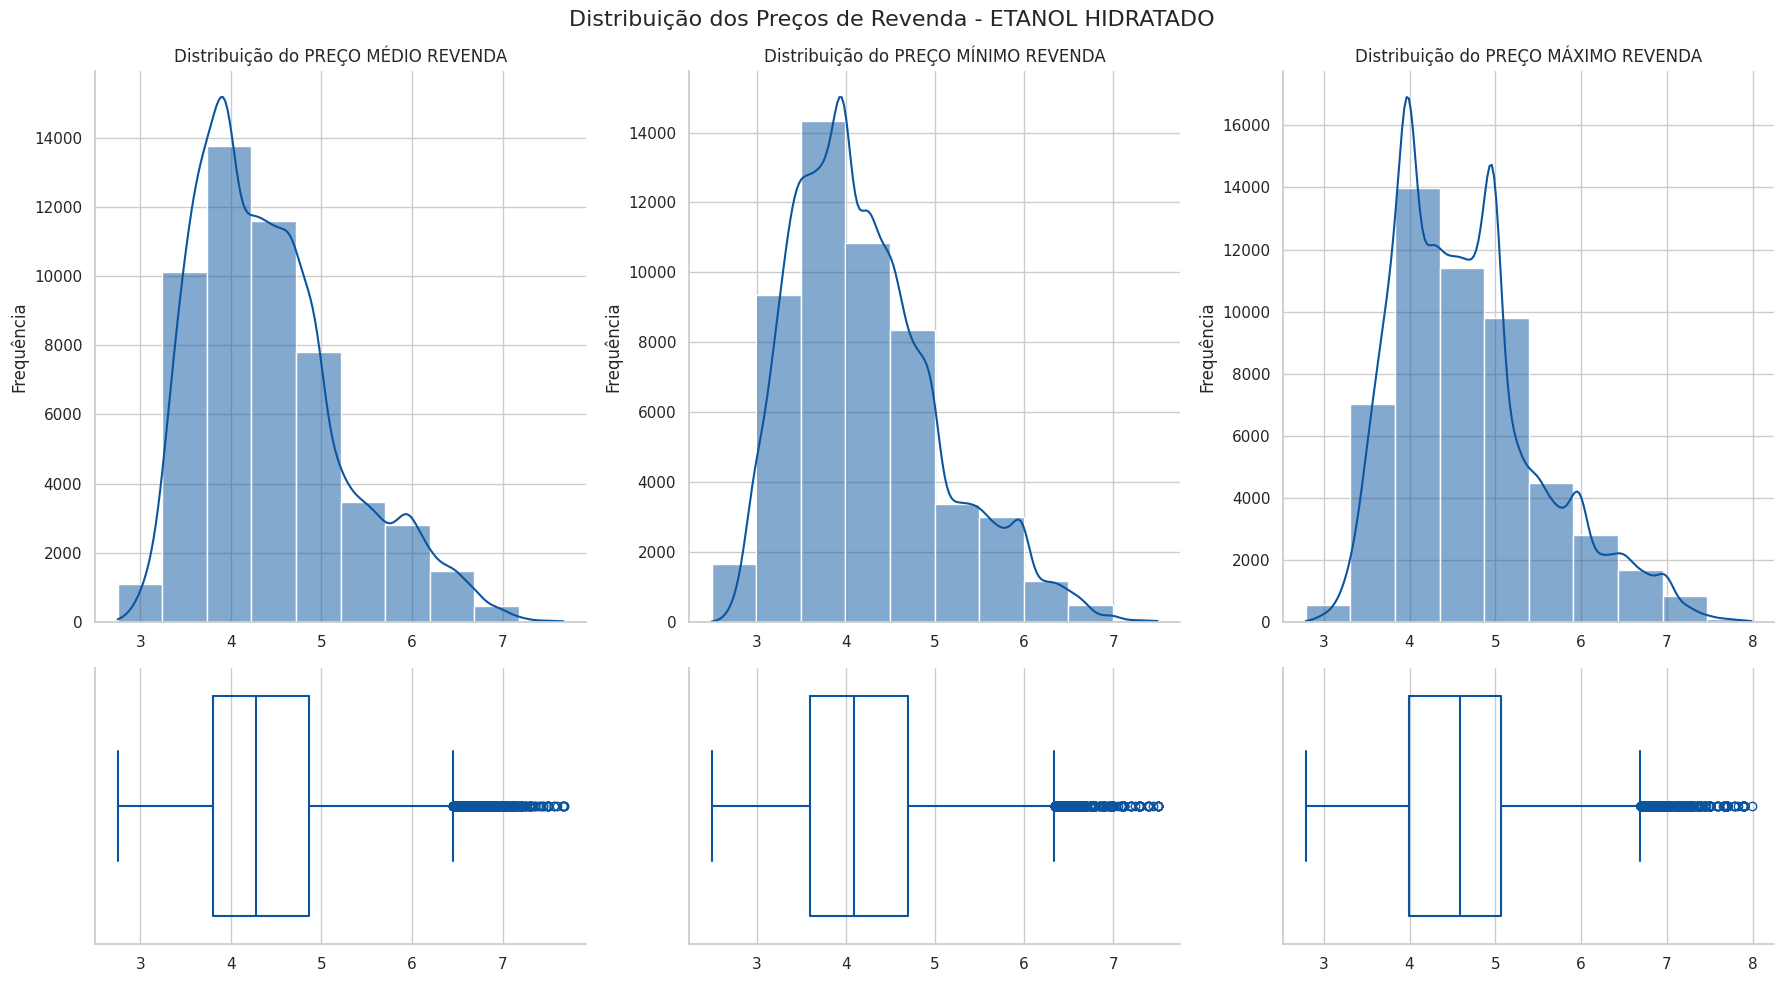

In [75]:
plot_distribuicao_precos("ETANOL HIDRATADO", df_combustivel)

**Análise dos Dados de Etanol Hidratado**

Os preços de revenda do etanol hidratado no Brasil, entre 2022 e 2024, mostram uma distribuição assimétrica positiva, com a maioria dos preços variando entre R\$ 3,80 e R\$ 4,85. A média dos preços é de R\$ 4,42, com preços mínimos em torno de R\$ 2.49 e máximos de R$ 7,98, indicando baixa variação no mercado durante o período analisado. O coeficiente de variação de 3,7% reflete baixa volatilidade, típica de mercados regulados. Embora o mercado seja estável, fatores regionais como impostos e custos logísticos ainda afetam as diferenças de preço.


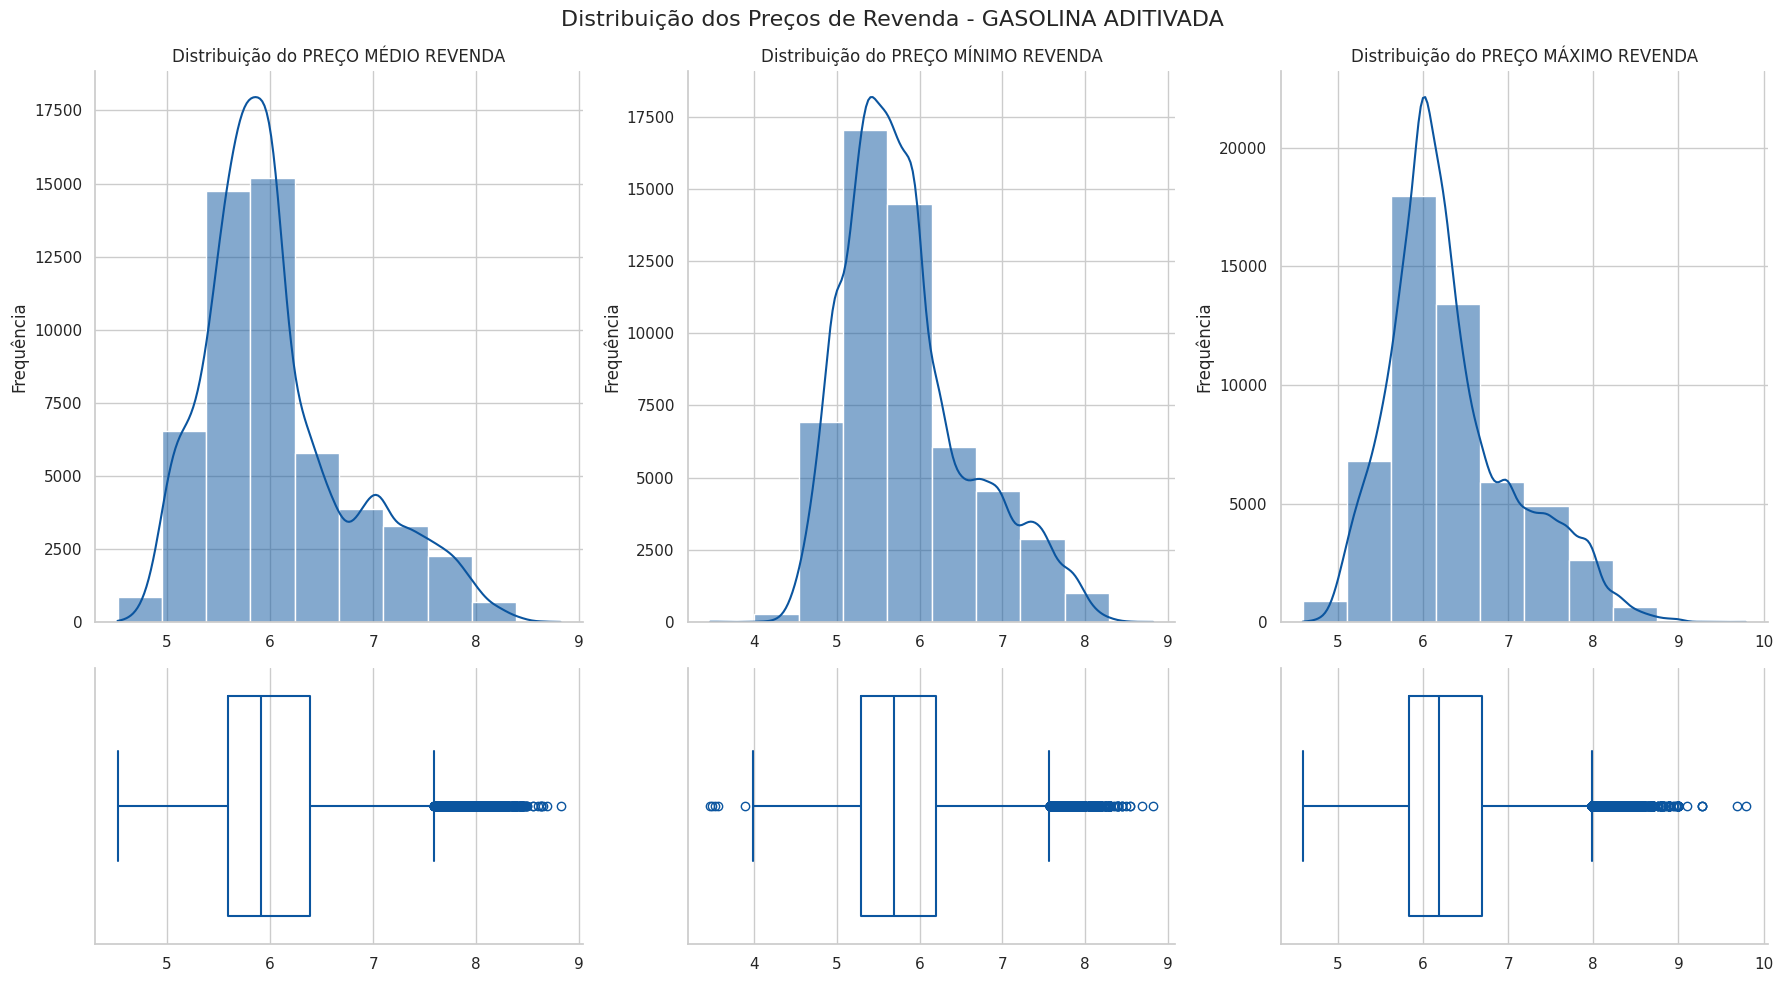

In [63]:
# GASOLINA ADITIVADA
plot_distribuicao_precos("GASOLINA ADITIVADA", df_combustivel)


**Análise dos Dados de Gasolina Aditivada**

Os preços de revenda da gasolina aditivada no Brasil, entre 2022 e 2024, mostram uma leve dispersão, com a maioria dos valores situados entre R\$ 5,59 e R\$ 6,39. A distribuição é assimétrica à direita, com alguns postos praticando preços acima da média. O preço médio de revenda é de R\$ 6,06, enquanto o preço máximo chega a R\$ 9,79. Apesar da concentração de preços em uma faixa específica, algumas exceções puxam o valor médio para cima. O coeficiente de variação médio de 2,95% indica uma oscilação de preços pouco expressiva, evidenciando um padrão consistente.

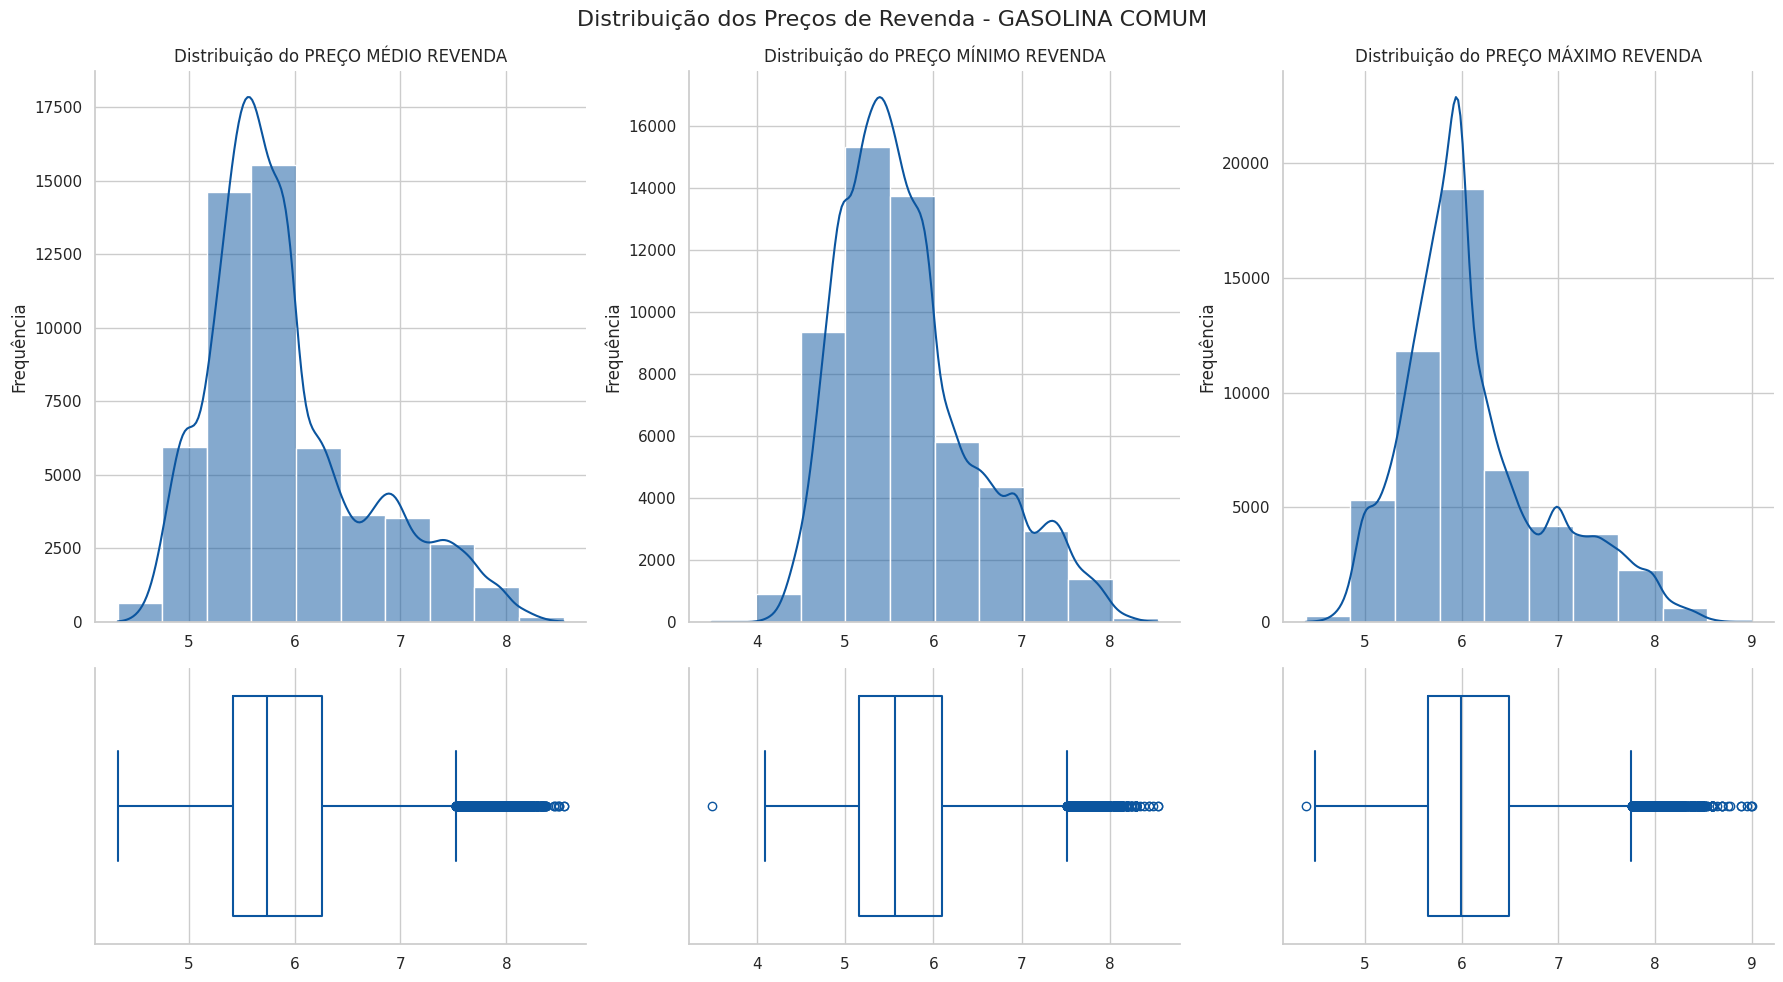

In [64]:
# GASOLINA COMUM
plot_distribuicao_precos("GASOLINA COMUM", df_combustivel)

**Análise dos Dados de Gasolina Comum**

A análise dos preços de revenda da gasolina comum de 2022 a 2024 revela uma distribuição assimétrica positiva. A maioria dos preços está entre R\$ 5,42 e R\$ 6,26, com a média em R\$ 5,91. No entanto, há postos com preços significativamente mais altos, com um máximo registrado de R\$ 8,99, indicando discrepâncias pontuais. O coeficiente de variação médio de 2,36% sugere estabilidade, mas os valores extremos, que variam de R\$ 3,49 a R\$ 8,99, indicam que fatores regionais podem causar variações significativas nos preços.

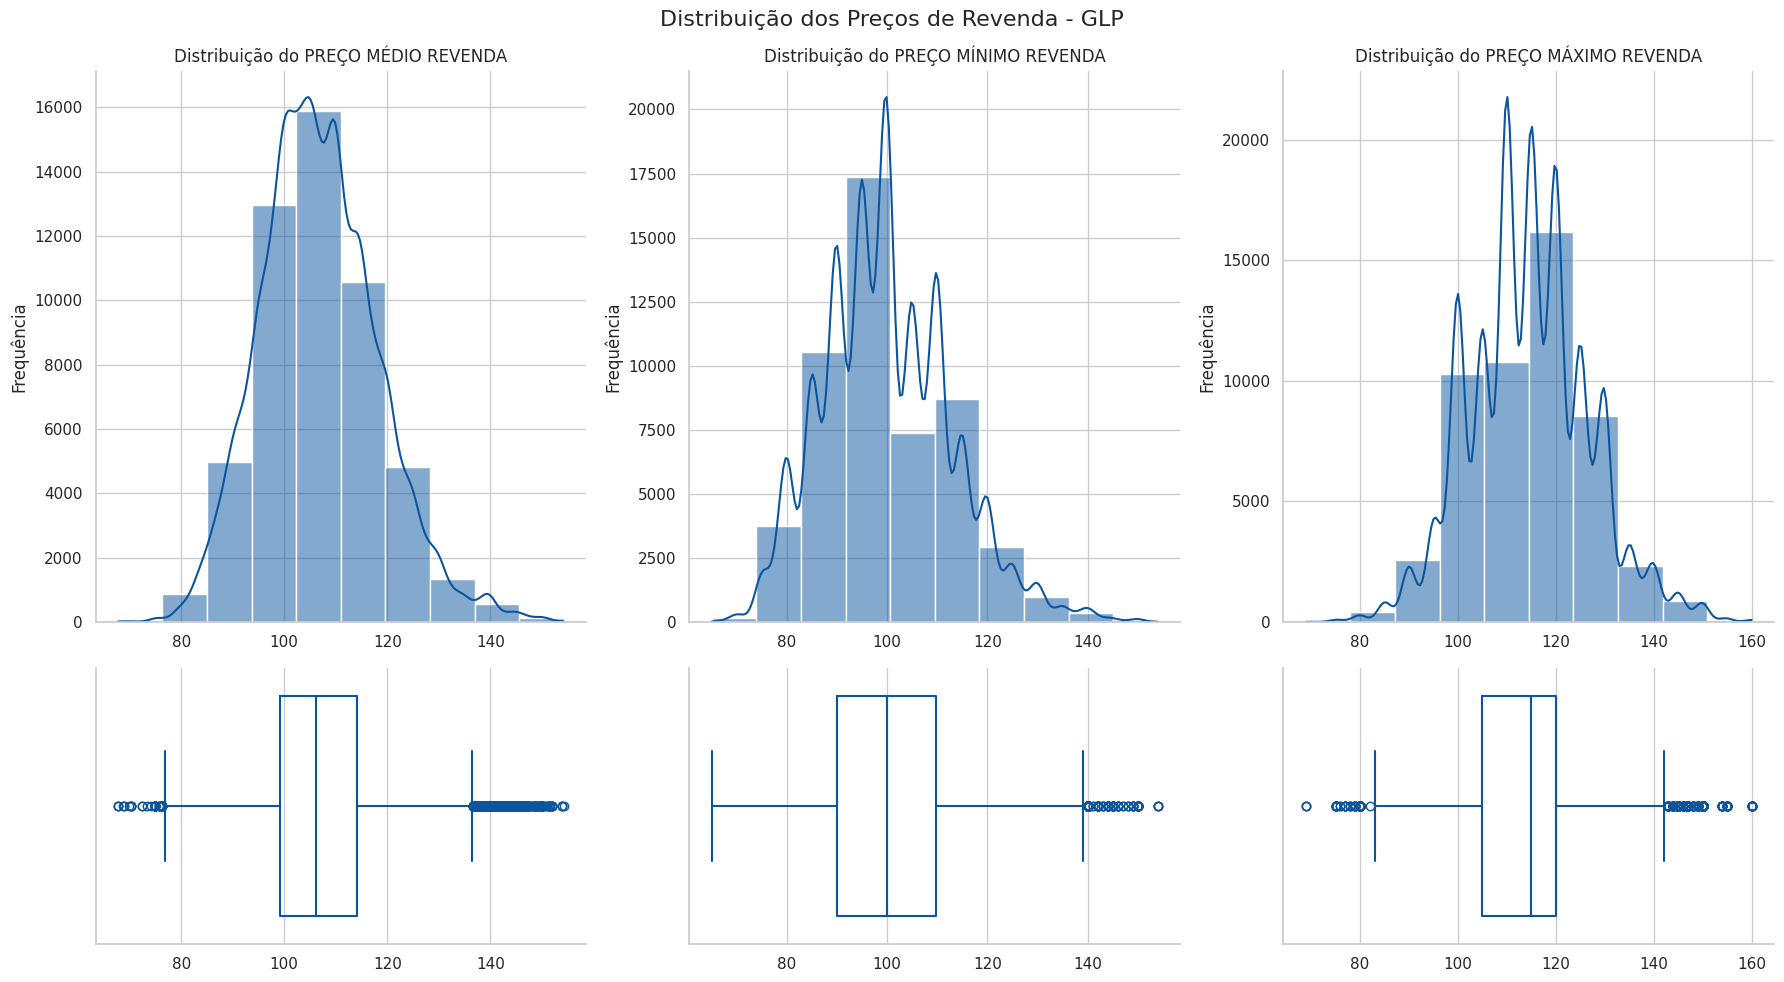

In [65]:
# GLP
plot_distribuicao_precos("GLP", df_combustivel)

**Análise dos Dados de GLP (Gás Liquefeito de Petróleo)**

Os dados de revenda do GLP mostram uma leve assimetria, com a maioria dos preços próximos à média de mercado. Contudo, há flutuações acentuadas nos extremos da distribuição. O preço médio de revenda é de R\$ 106,85, com um desvio padrão de R\$ 11,40 e um coeficiente de variação médio de 4,78%. Isso sugere estabilidade geral, embora as flutuações na amplitude dos preços máximos e mínimos sejam consideráveis.

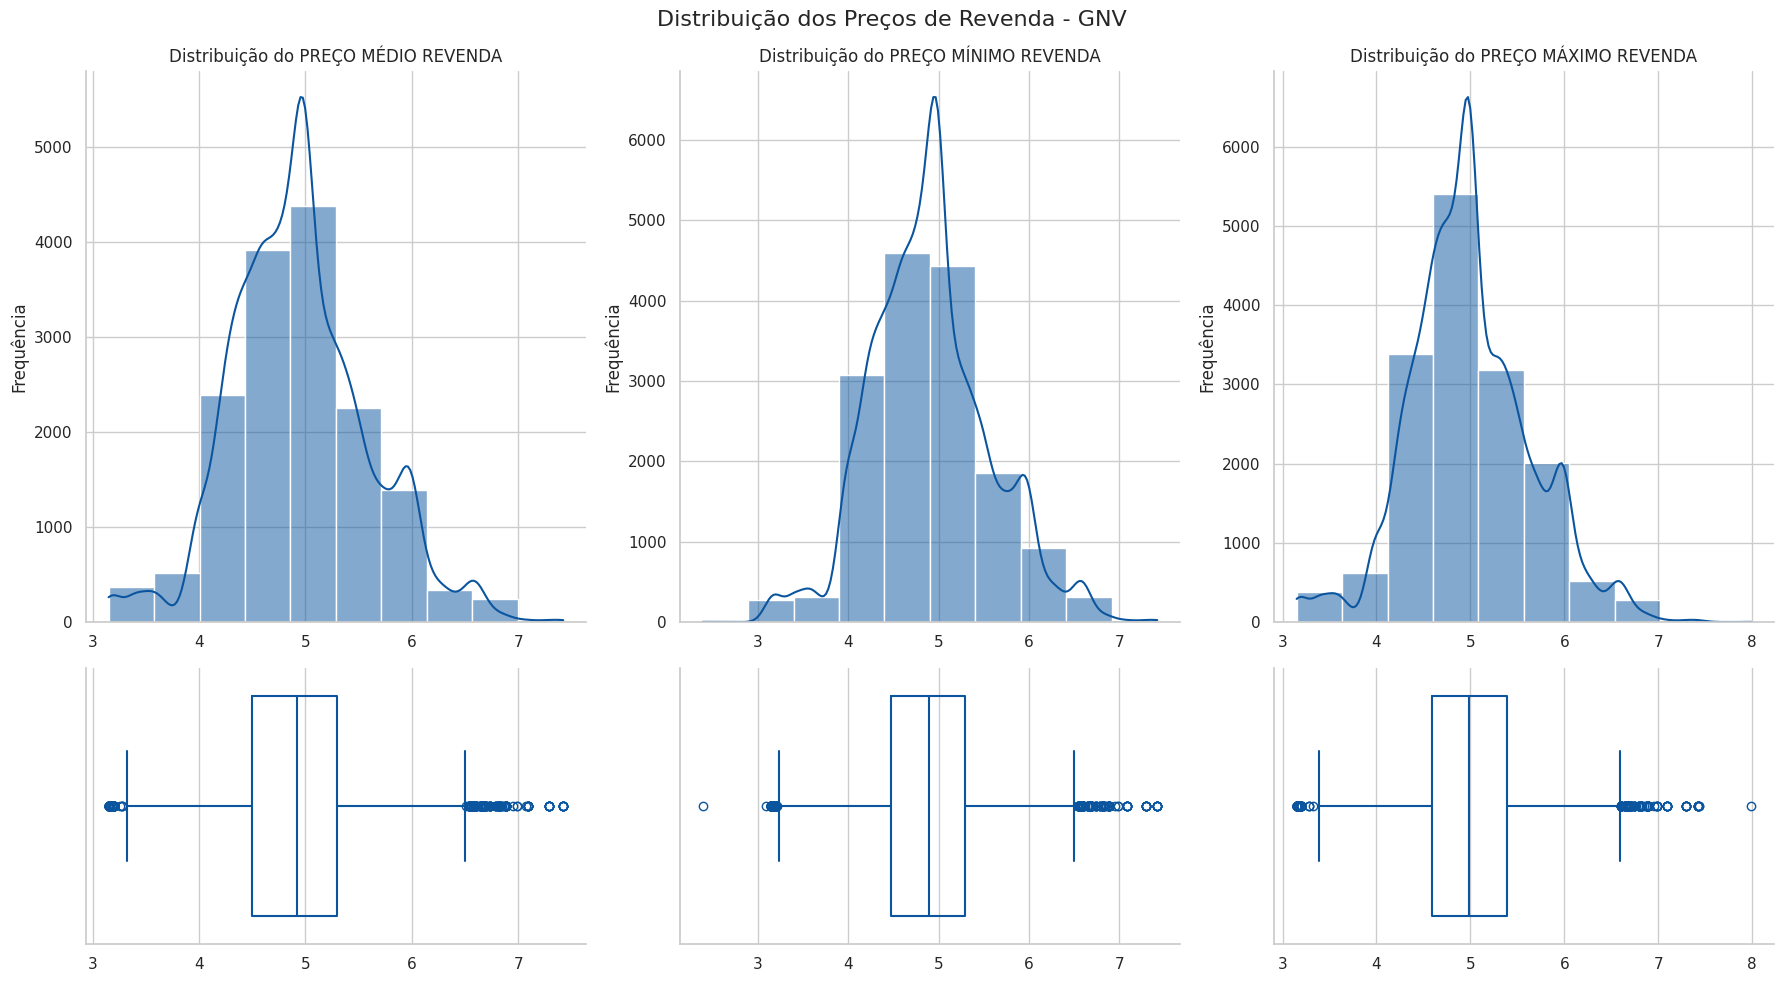

In [66]:
# GNV
plot_distribuicao_precos("GNV", df_combustivel)

**Análise dos Dados de GNV (Gás Natural Veicular)**

A análise dos preços de revenda do GNV entre 2022 e 2024 revela uma média de R\$ 4,94, com um desvio padrão de R$ 0,64 e um coeficiente de variação de 0,83%, indicando uma distribuição significativamente estável. A maioria dos preços está entre R\$ 4,50 e R\$ 5,30. No entanto, variações nos preços mínimos e máximos sugerem que existem elementos externos que influenciam a variação dos preços, principalmente quando nos aproximamos dos valores mais altos da escala.

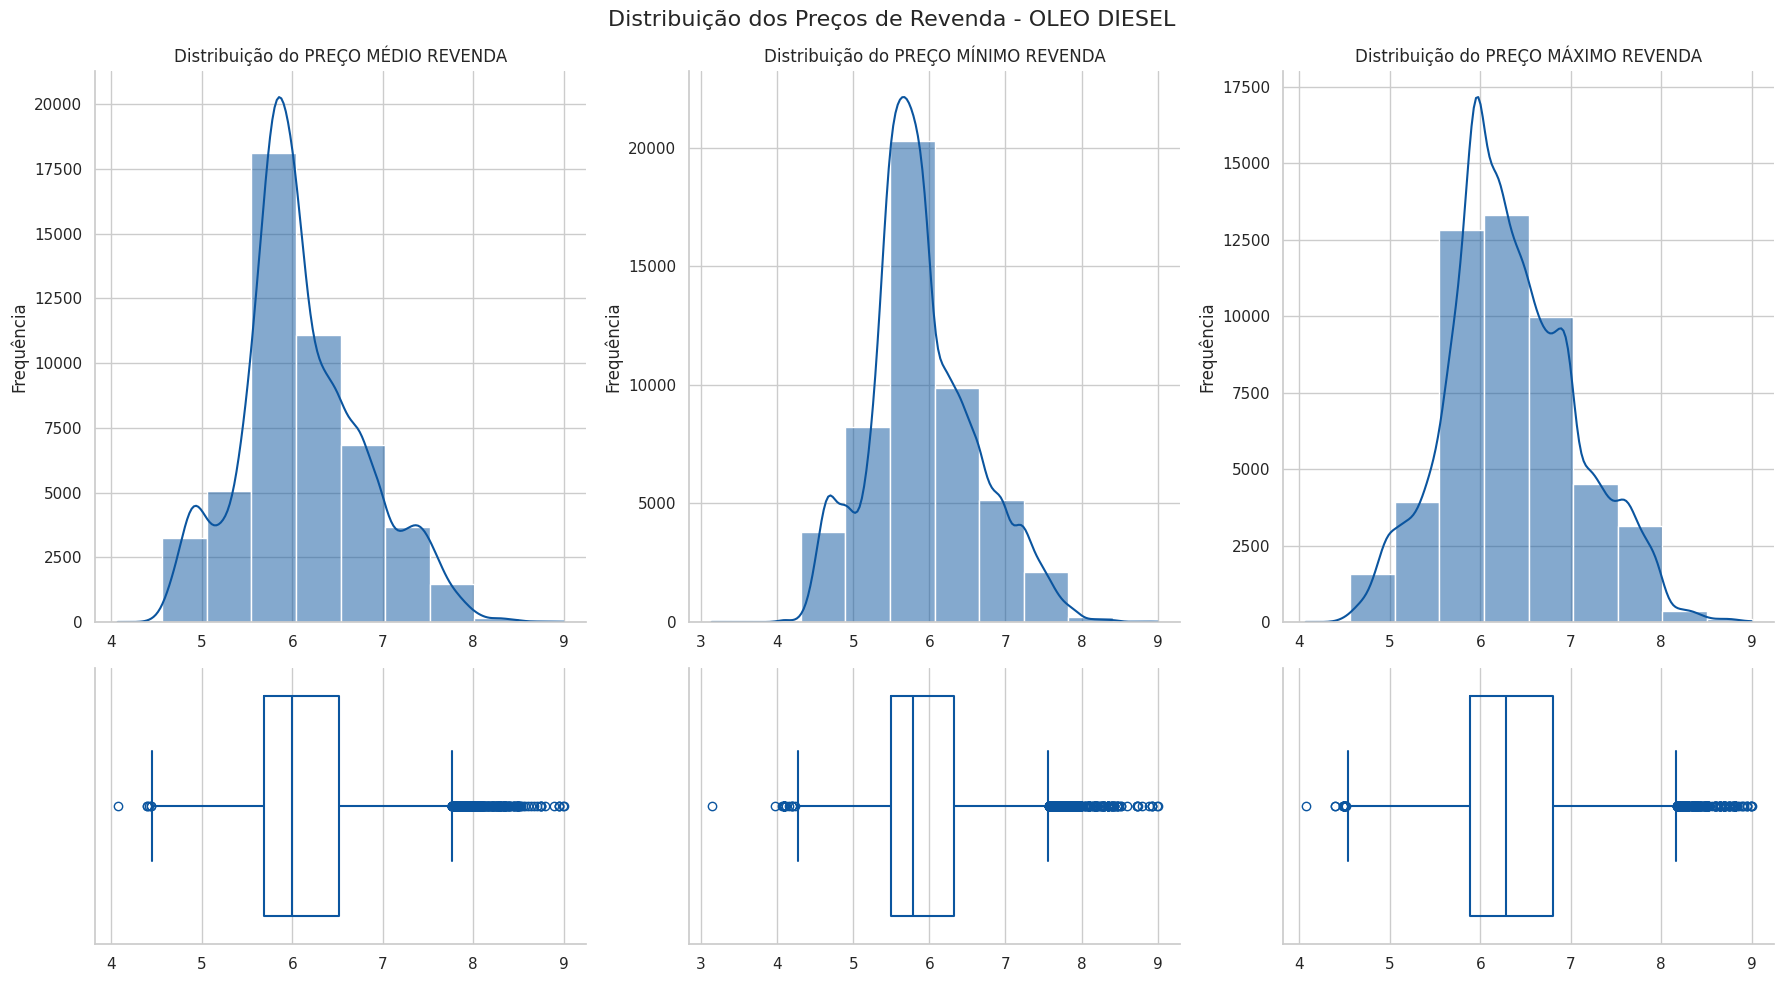

In [67]:
# OLEO DIESEL
plot_distribuicao_precos("OLEO DIESEL", df_combustivel)

**Análise dos Dados de OLEO DIESEL**

Os preços de revenda do óleo diesel entre 2022 e 2024 têm uma média de R\$ 6,11, com um desvio padrão de R\$ 0,68 e um coeficiente de variação de aproximadamente 2,9%. A maioria dos preços está entre R$ 5,69 e R$ 6,52. A amplitude total dos preços varia de R\$ 3,14 a R\$ 9,00, refletindo variações regionais ou econômicas que influenciam os preços praticados.

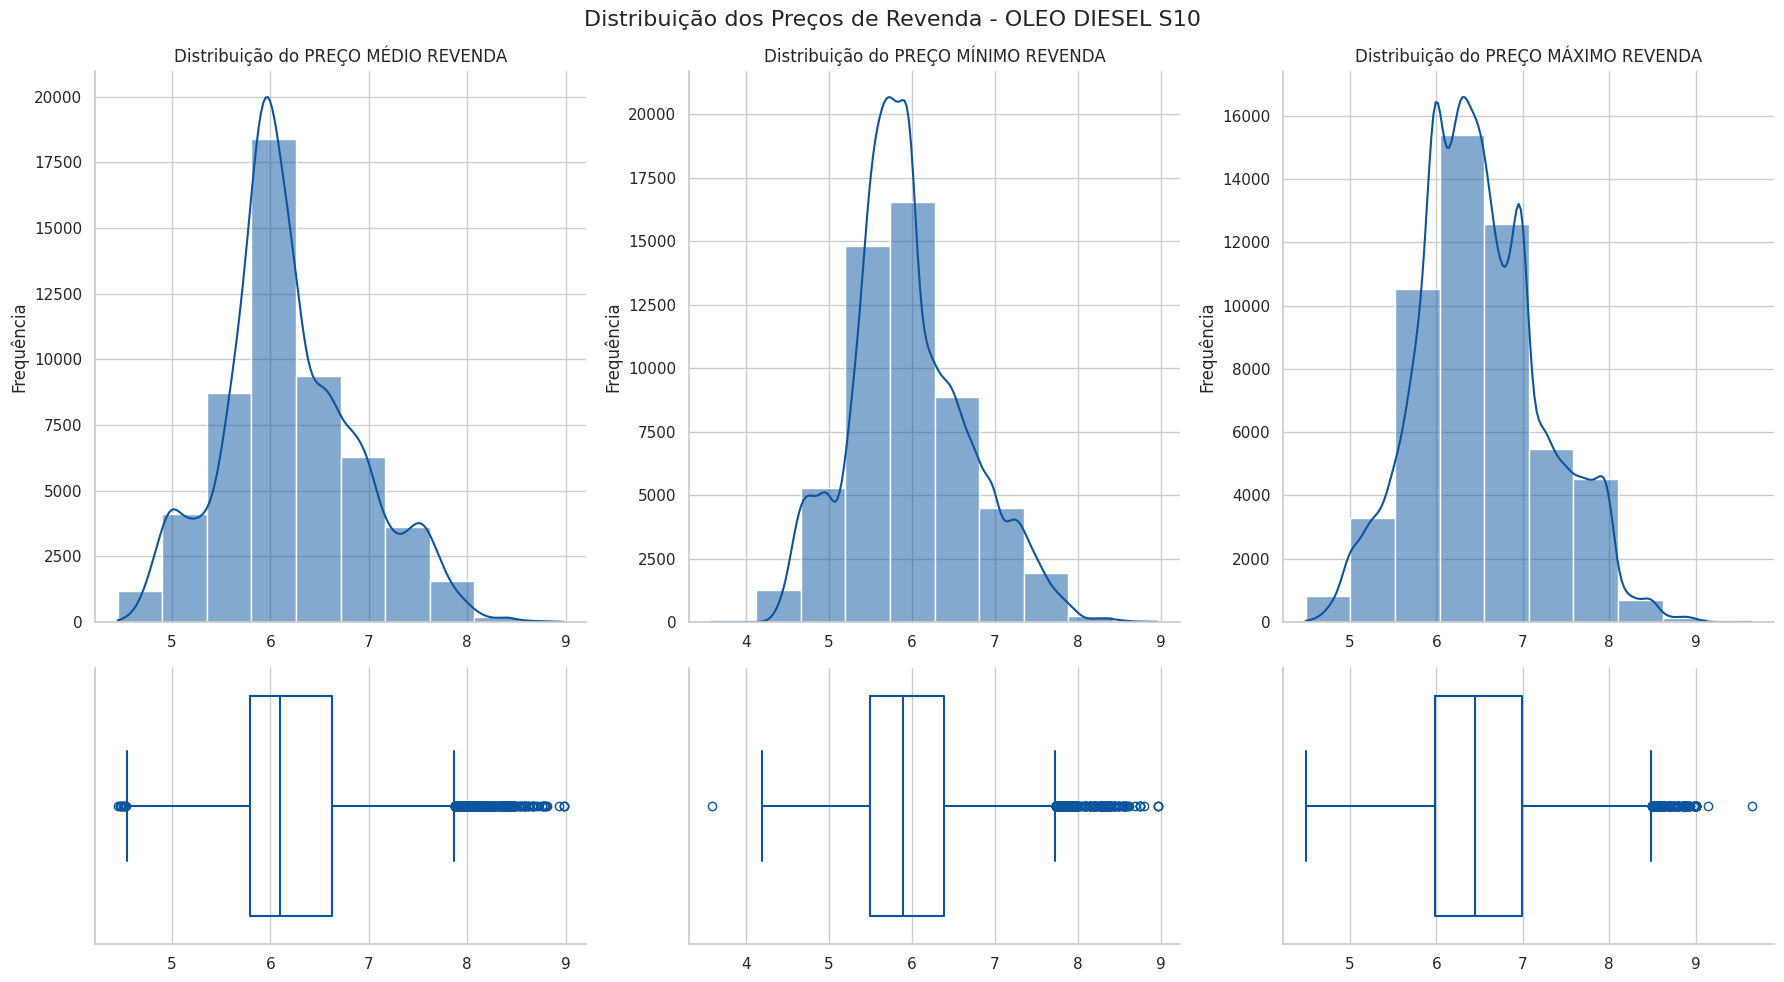

In [68]:
# OLEO DIESEL S10
plot_distribuicao_precos("OLEO DIESEL S10", df_combustivel)

**Análise dos Dados de OLEO DIESEL S10**

A análise dos preços de revenda do óleo diesel S10, de 2022 a 2024, revela uma média estável de R\$ 6,20, com um coeficiente de variação de 3,23%. A maioria dos preços está entre R\$ 5,79 e R\$ 6,62. Contudo, a amplitude dos preços varia de R\$ 3,59 a R\$ 9,65, indicando grandes discrepâncias regionais ou condições de mercado que causam variações significativas.